In [299]:
#%reset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib widget

import cmocean
import glob

import os

import math
from datetime import timedelta, datetime
from operator import attrgetter

from datetime import timedelta as delta

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import pop_tools
from scipy.optimize import curve_fit


In [300]:
grid = pop_tools.get_grid('POP_gx1v7')[['TAREA', 'KMT', 'TLAT', 'TLONG', 'REGION_MASK']]

In [301]:
def process(da):
    
    da['ALK_excess'] = da.ALK - da.ALK_ALT_CO2
    da['DIC_excess'] = da.DIC - da.DIC_ALT_CO2
    da['pCO2_SURF_excess'] = da.pCO2SURF - da.pCO2SURF_ALT_CO2

    da['CO2_flux_frac'] = ((da.FG_CO2-da.FG_ALT_CO2)*da.TAREA*1e-6).cumsum('time')/(((da.FG_CO2-da.FG_ALT_CO2)*da.TAREA*1e-6).cumsum('time').sum(['nlat','nlon']))

    return da

Read data

In [326]:
%%time
#fpath = '/glade/scratch/mclong/OAE-Global-Efficiency/archive/smyle-fosi.North_Atlantic_basin_yearlong.alk-forcing-North_Atlantic_basin_yearlong.063-01/ocn/hist/'

location  = 'North_Pacific_basin' #North_Atlantic_basin or North_Pacific_basin
polygon = '105'                    #for Atlantic: 0, 16, 36, 63; for Pacific: 105, 155 added 51, 64, 184, 185

# 1 year continuous release:
fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Elizabeth_IRF_Experiments/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1year/ocn/hist/'
da_1yr = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1year.pop.h.*.nc')
print(da_1yr)

# 5 year continuous release:
fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Elizabeth_IRF_Experiments/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-5year/ocn/hist/'
da_5yr = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-5year.pop.h.*.nc')
print(da_5yr)


<xarray.Dataset>
Dimensions:                     (d2: 2, nlat: 384, nlon: 320, time: 240, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                        (time) object 0347-02-01 00:00:00 ... 0367-01...
  * z_t                         (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                         (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                     (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
    ULONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                        (nlat, nlon) float64 dask.array

In [327]:
#Month-long release for each month:
fpath = f'/glade/scratch/mengyangz/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-01/ocn/hist/'
da_01 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-01.pop.h.*.nc')
print(da_01)

fpath = f'/glade/scratch/mengyangz/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-04/ocn/hist/'
da_04 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-04.pop.h.*.nc')
print(da_04)

fpath = f'/glade/scratch/mengyangz/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-07/ocn/hist/'
da_07 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-07.pop.h.*.nc')
print(da_07)

#Month-long release for each month:
fpath = f'/glade/scratch/mengyangz/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-10/ocn/hist/'
da_10 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-10.pop.h.*.nc')
print(da_10)

da_01 = process(da_01)
da_04 = process(da_04)
da_07 = process(da_07)
da_10 = process(da_10)

<xarray.Dataset>
Dimensions:                     (d2: 2, nlat: 384, nlon: 320, time: 180, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                        (time) object 0347-02-01 00:00:00 ... 0362-01...
  * z_t                         (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                         (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                     (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
    ULONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                        (nlat, nlon) float64 dask.array

In [328]:
print('done')

done


In [329]:
da_1yr = process(da_1yr)
da_5yr = process(da_5yr)


In [330]:
da_1yr.CO2_flux_frac[0].sum().values

array(1.)

In [272]:
# def excess_dic(da):
    
#     dic_inv = ((da.DIC - da.DIC_ALT_CO2) * da.dz * da.TAREA).sum(['z_t', 'nlat', 'nlon']) * 1e-9
#     dic_inv = dic_inv.compute()
    
#     return dic_inv

In [273]:
# #Still need to multiply this by the number of days in total (since we're summing over months that have unequal day numbers)
# def cal_added_ALk(da):
#     '''Total added ALK, in mol'''
#     #ALk_added_total = (da.ALK_FLUX * da.TAREA).sum(['time','nlat', 'nlon'])*1e-9*86400 # mol/day for that one month

#     ALk_added_total = (da.ALK_FLUX * da.TAREA).sum(['nlat', 'nlon']).cumsum(['time'])*1e-9*86400 # mol/day for that one month
#     return ALk_added_total.values

In [331]:
def plot_flux(da, tstep):
    
        fig = plt.figure(figsize=(10,7))

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-120)) #central_longitude=-120 for Pacific
        ax.stock_img()
        ax.coastlines(linewidth=0.5, color='blue', resolution='110m')
        mask = da.isel(time=tstep, z_t=0).ALK_excess*0+1.

        sca = ax.pcolormesh(grid.TLONG,
                      grid.TLAT,
                      da.isel(time=tstep).CO2_flux_frac*mask*100,vmin=0,vmax=.5,
                      transform=ccrs.PlateCarree(),
                      cmap=cmocean.cm.dense);  
        cb = fig.colorbar(sca, ax=ax, shrink=0.74)

        cb.ax.set_title('%') 


        # ax.set_extent([-110, 30, 0, 80], ccrs.PlateCarree())
        # ax.set_xticks(np.arange(-110, 30, 10), crs=ccrs.PlateCarree())
        # ax.set_yticks(np.arange(0, 80, 10), crs=ccrs.PlateCarree())      

        ax.set_extent([-130, 30, -50, 80], ccrs.PlateCarree(central_longitude=-120)) #originally -110 limit
        ax.set_xticks(np.arange(-130, 30, 20), crs=ccrs.PlateCarree(central_longitude=-120))
        ax.set_yticks(np.arange(-50, 80, 10), crs=ccrs.PlateCarree(central_longitude=-120))
        
        lon_formatter = LongitudeFormatter(zero_direction_label=False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)  

        ax.stock_img()
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.grid()
        ax.set_title('Fraction of cumulative uptake ' + str(da.time.values[tstep])[:10], loc='left')

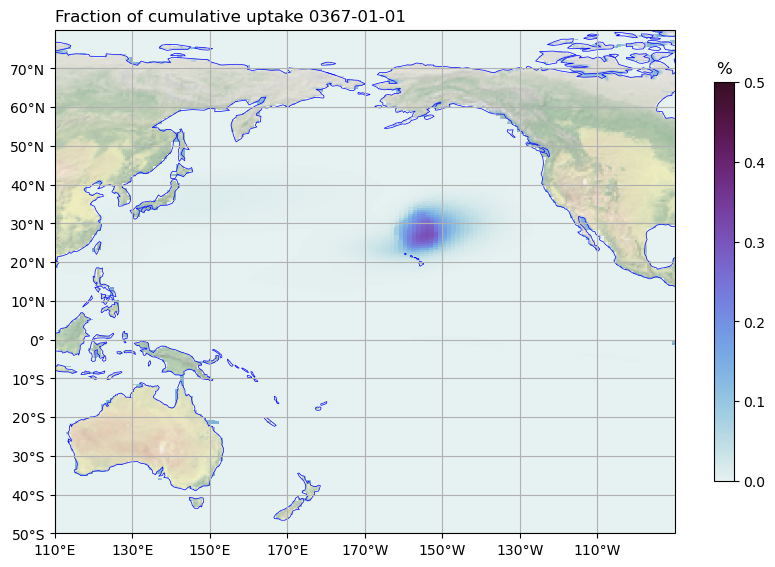

In [332]:
plot_flux(da_1yr,-1) #vmax = 0.005

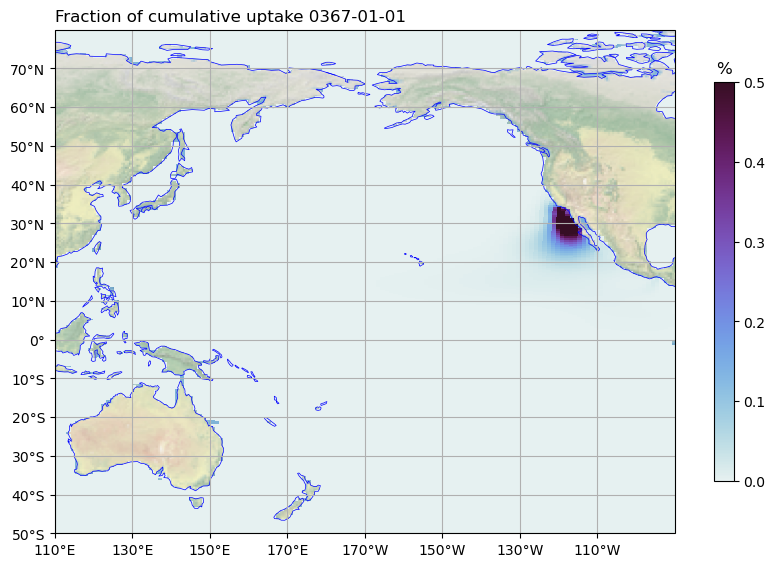

In [309]:
plot_flux(da_5yr,-1) #vmax = 0.005

In [ ]:
plot_flux(da_01,-1)

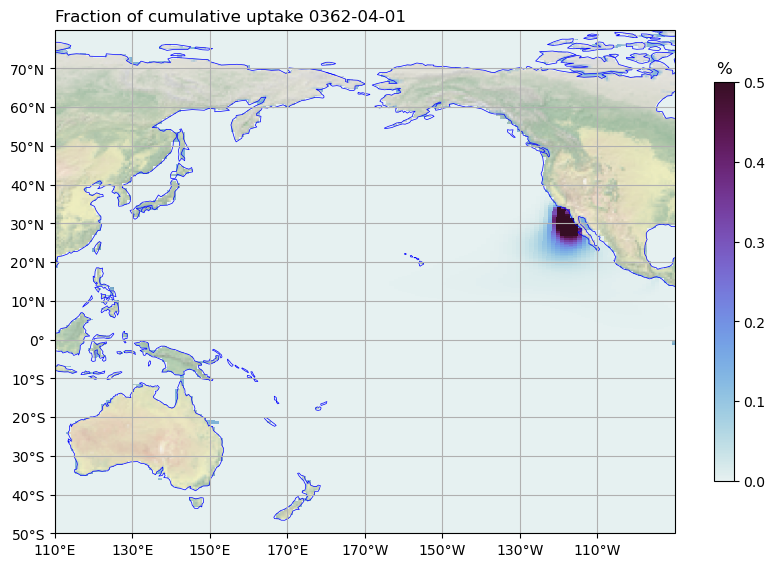

In [311]:
plot_flux(da_04,-1)

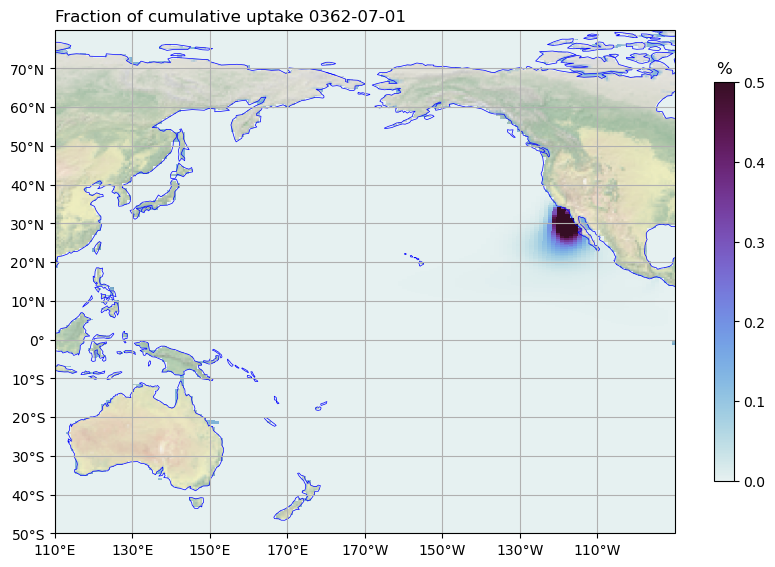

In [312]:
plot_flux(da_07,-1)

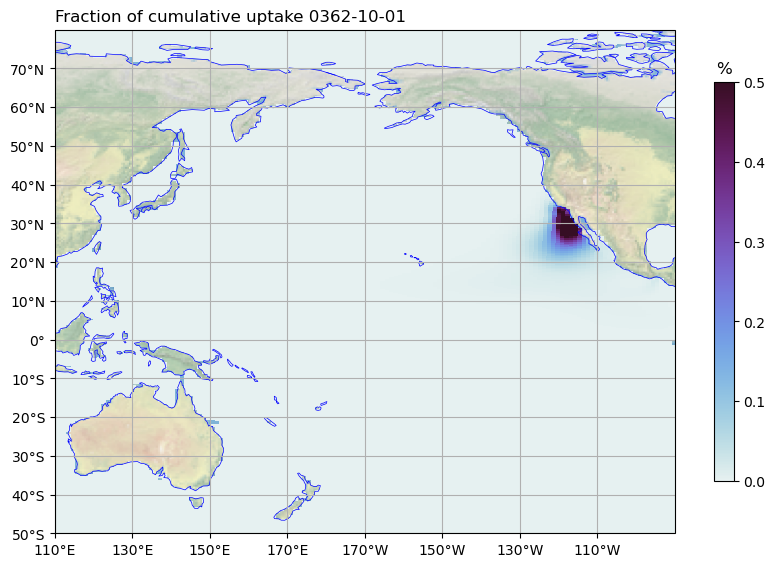

In [313]:
plot_flux(da_10,-1)

In [333]:
#Get maximum point
test = np.array(da_01.isel(time=0).CO2_flux_frac*da_01.TAREA.isel(time=0))
test[np.isnan(test)] = 0
from scipy import ndimage
lati = round(ndimage.measurements.center_of_mass(test)[0])
loni = round(ndimage.measurements.center_of_mass(test)[1])
latval = grid.TLAT[lati,loni].values
lonval = grid.TLONG[lati,loni].values
print(latval, lonval)

27.56221103360013 203.8158199980728


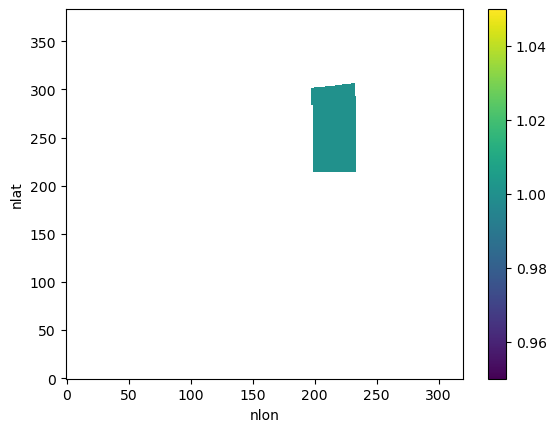

In [334]:
masklat = grid.TLAT.where(grid.TLAT<latval+2.5).where(grid.TLAT>latval-2.5)
masklon = grid.TLONG.where(grid.TLONG<lonval+2.5).where(grid.TLONG>lonval-2.5)
mask_5deg = masklat*masklon*0+1

masklat = grid.TLAT.where(grid.TLAT<latval+5).where(grid.TLAT>latval-5)
masklon = grid.TLONG.where(grid.TLONG<lonval+5).where(grid.TLONG>lonval-5)
mask_10deg = masklat*masklon*0+1

masklat = grid.TLAT.where(grid.TLAT<latval+7.5).where(grid.TLAT>latval-7.5)
masklon = grid.TLONG.where(grid.TLONG<lonval+7.5).where(grid.TLONG>lonval-7.5)
mask_15deg = masklat*masklon*0+1


masklat = grid.TLAT.where(grid.TLAT<latval+10).where(grid.TLAT>latval-10)
masklon = grid.TLONG.where(grid.TLONG<lonval+10).where(grid.TLONG>lonval-10)
mask_20deg = masklat*masklon*0+1

masklat = grid.TLAT.where(grid.TLAT<latval+12.5).where(grid.TLAT>latval-12.5)
masklon = grid.TLONG.where(grid.TLONG<lonval+12.5).where(grid.TLONG>lonval-12.5)
mask_25deg = masklat*masklon*0+1

masklat = grid.TLAT.where(grid.TLAT<latval+15).where(grid.TLAT>latval-15)
masklon = grid.TLONG.where(grid.TLONG<lonval+15).where(grid.TLONG>lonval-15)
mask_30deg = masklat*masklon*0+1

masklat = grid.TLAT.where(grid.TLAT<latval+20).where(grid.TLAT>latval-20)
masklon = grid.TLONG.where(grid.TLONG<lonval+20).where(grid.TLONG>lonval-20)
mask_40deg = masklat*masklon*0+1
mask_40deg.plot()

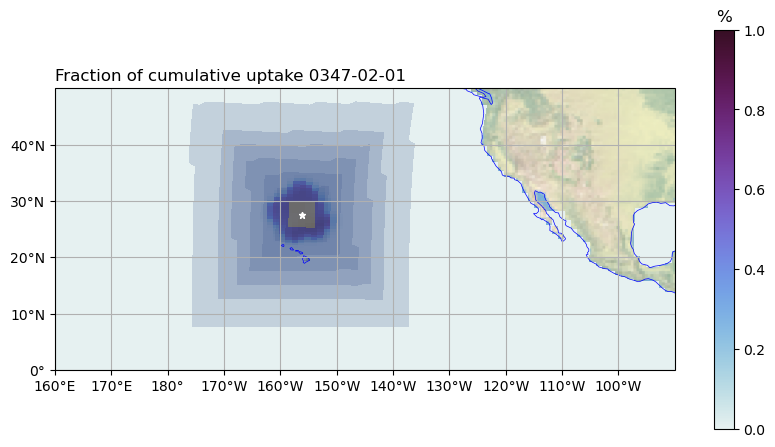

In [335]:
da = da_01;
tstep= 0;


fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-120)) #central_longitude=-120 for Pacific
ax.stock_img()
ax.coastlines(linewidth=0.5, color='blue', resolution='110m')
mask = da.isel(time=tstep, z_t=0).ALK_excess*0+1.

sca = ax.pcolormesh(grid.TLONG,
                grid.TLAT,
                da.isel(time=tstep).CO2_flux_frac*mask*100,vmin=0,vmax=1,
                transform=ccrs.PlateCarree(),
                cmap=cmocean.cm.dense);  


ax.contourf(grid.TLONG,grid.TLAT,mask_40deg,transform=ccrs.PlateCarree(),alpha=.2);  
ax.contourf(grid.TLONG,grid.TLAT,mask_30deg,transform=ccrs.PlateCarree(),alpha=.2);  
ax.contourf(grid.TLONG,grid.TLAT,mask_25deg,transform=ccrs.PlateCarree(),alpha=.2);  
ax.contourf(grid.TLONG,grid.TLAT,mask_20deg,transform=ccrs.PlateCarree(),alpha=.2);  
ax.contourf(grid.TLONG,grid.TLAT,mask_15deg,transform=ccrs.PlateCarree(),alpha=.2);  
ax.contourf(grid.TLONG,grid.TLAT,mask_10deg,transform=ccrs.PlateCarree(),alpha=.2);  
ax.contourf(grid.TLONG,grid.TLAT,mask_5deg,colors=['yellow'],transform=ccrs.PlateCarree(),alpha=.2);  


cb = fig.colorbar(sca, ax=ax, shrink=0.74)
cb.ax.set_title('%') 
ax.set_extent([-80, 10, 0, 50], ccrs.PlateCarree(central_longitude=-120)) #originally -110 limit
ax.set_xticks(np.arange(-80, 10, 10), crs=ccrs.PlateCarree(central_longitude=-120))
ax.set_yticks(np.arange(0, 50, 10), crs=ccrs.PlateCarree(central_longitude=-120))


# ax.set_extent([-50, 30, 0, 60], ccrs.PlateCarree(central_longitude=-120)) #originally -110 limit
# ax.set_xticks(np.arange(-50, 30, 10), crs=ccrs.PlateCarree(central_longitude=-120))
# ax.set_yticks(np.arange(0, 60, 10), crs=ccrs.PlateCarree(central_longitude=-120))
        
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)  

ax.stock_img()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.grid()
ax.set_title('Fraction of cumulative uptake ' + str(da.time.values[tstep])[:10], loc='left')

ax.plot(grid.TLONG[lati,loni],grid.TLAT[lati,loni],'*w',markersize=5,transform=ccrs.PlateCarree())


# ax.plot(grid.TLONG[lati-9:lati+10,loni-5],grid.TLAT[lati-9:lati+10,loni-5],'-r',linewidth=1,transform=ccrs.PlateCarree())
# ax.plot(grid.TLONG[lati-9:lati+10,loni+5],grid.TLAT[lati-9:lati+10,loni+5],'-r',linewidth=1,transform=ccrs.PlateCarree())
# ax.plot(grid.TLONG[lati-9,loni-5:loni+6],grid.TLAT[lati-9,loni-5:loni+6],'-r',linewidth=1,transform=ccrs.PlateCarree())
# ax.plot(grid.TLONG[lati+9,loni-5:loni+6],grid.TLAT[lati+9,loni-5:loni+6],'-r',linewidth=1,transform=ccrs.PlateCarree())



In [336]:
data = da_01.isel(time=0).CO2_flux_frac
month1 = [np.nansum(data*mask_5deg), np.nansum(data*mask_10deg), np.nansum(data*mask_15deg), np.nansum(data*mask_20deg), np.nansum(data*mask_25deg), np.nansum(data*mask_30deg), np.nansum(data*mask_40deg)]

data = da_01.isel(time=12).CO2_flux_frac
year1 = [np.nansum(data*mask_5deg), np.nansum(data*mask_10deg), np.nansum(data*mask_15deg), np.nansum(data*mask_20deg), np.nansum(data*mask_25deg), np.nansum(data*mask_30deg), np.nansum(data*mask_40deg)]

data = da_01.isel(time=36).CO2_flux_frac
year3 = [np.nansum(data*mask_5deg), np.nansum(data*mask_10deg), np.nansum(data*mask_15deg), np.nansum(data*mask_20deg), np.nansum(data*mask_25deg), np.nansum(data*mask_30deg), np.nansum(data*mask_40deg)]


data = da_01.isel(time=60).CO2_flux_frac
year5 = [np.nansum(data*mask_5deg), np.nansum(data*mask_10deg), np.nansum(data*mask_15deg), np.nansum(data*mask_20deg), np.nansum(data*mask_25deg), np.nansum(data*mask_30deg),np.nansum(data*mask_40deg)]
print('done 1')

data = da_01.isel(time=120).CO2_flux_frac
year10 = [np.nansum(data*mask_5deg), np.nansum(data*mask_10deg), np.nansum(data*mask_15deg), np.nansum(data*mask_20deg), np.nansum(data*mask_25deg), np.nansum(data*mask_30deg),np.nansum(data*mask_40deg)]
print('done 2')

data = da_01.isel(time=179).CO2_flux_frac
year15 = [np.nansum(data*mask_5deg), np.nansum(data*mask_10deg), np.nansum(data*mask_15deg), np.nansum(data*mask_20deg), np.nansum(data*mask_25deg), np.nansum(data*mask_30deg),np.nansum(data*mask_40deg)]
print('done 3')


done 1
done 2
done 3


In [337]:
print('done')

done


Text(0.5, 1.0, 'CO${_2}$ Flux Fraction by Region')

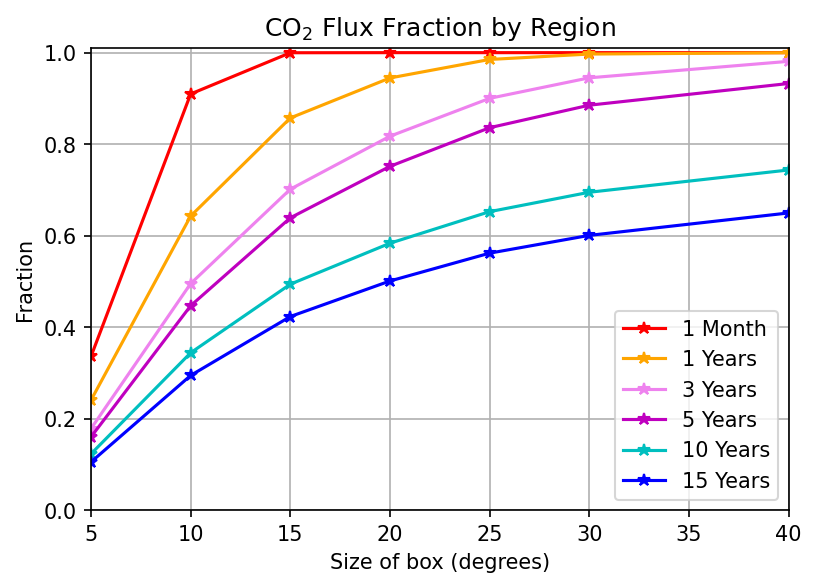

In [338]:
fig = plt.figure(figsize=(6,4),dpi=150)

boxes = [5,10,15,20,25,30,40]

plt.plot(boxes,month1,'-*r',label='1 Month')
plt.plot(boxes,year1,'*-',c='orange',label='1 Years')
plt.plot(boxes,year3,'*-',c='violet',label='3 Years')

plt.plot(boxes,year5,'-*m',label='5 Years')
plt.plot(boxes,year10,'-*c',label='10 Years')
plt.plot(boxes,year15,'-*b',label='15 Years')

# plt.fill_between(x_data, eff_mean-2*eff_stddev, eff_mean+2*eff_stddev,facecolor='lightgrey',alpha=1,label='2$\sigma$ envelope')

plt.xticks(ticks=np.arange(5,45,5))

plt.xlim([5,40])
plt.ylim([0,1.01])
plt.xlabel('Size of box (degrees)')
plt.ylabel('Fraction')
plt.grid()
plt.legend(fontsize=10)
plt.title('CO${_2}$ Flux Fraction by Region')

In [296]:
np.arange(5,45,5)

array([ 5, 10, 15, 20, 25, 30, 35, 40])